In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [3]:
airline.dropna(inplace=True)

In [4]:
airline.index = pd.to_datetime(airline.index)

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [6]:
airline['6-Month-Moving-Average'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [7]:
airline['Yearly-Moving-Average'] = airline['Thousands of Passengers'].rolling(window=12).mean()

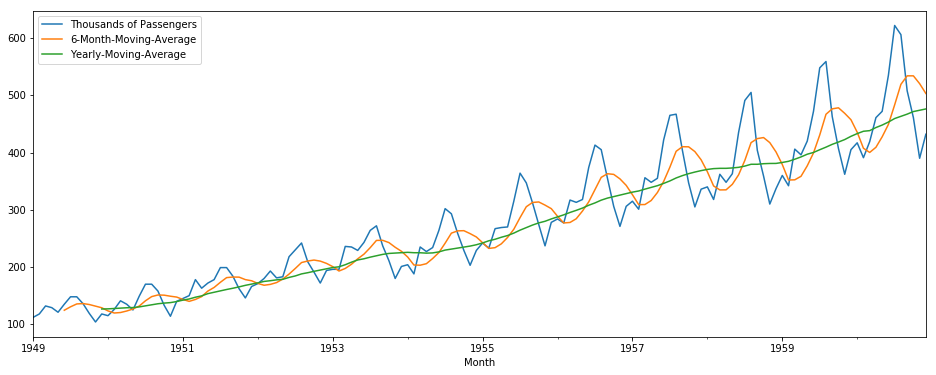

In [8]:
airline.plot(figsize=(16,6))

## EWMA (Exponential Weighted Moving Average)

In [9]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

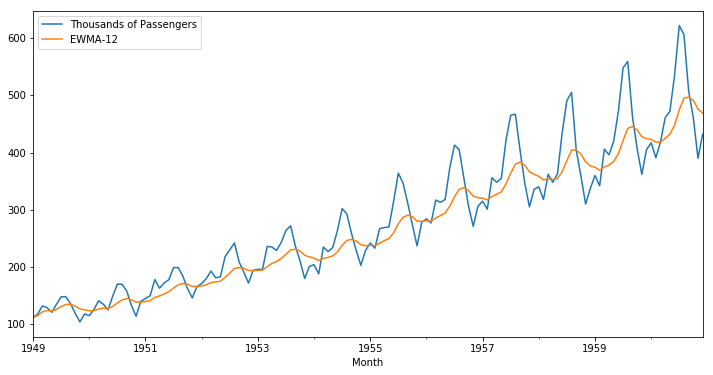

In [13]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,6))

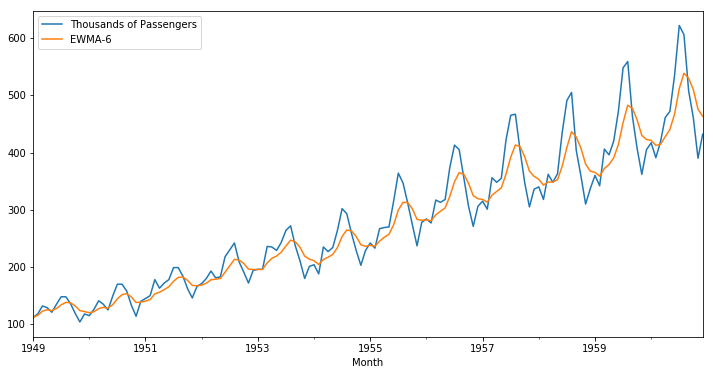

In [14]:
airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span=6).mean()
airline[['Thousands of Passengers','EWMA-6']].plot(figsize=(12,6))

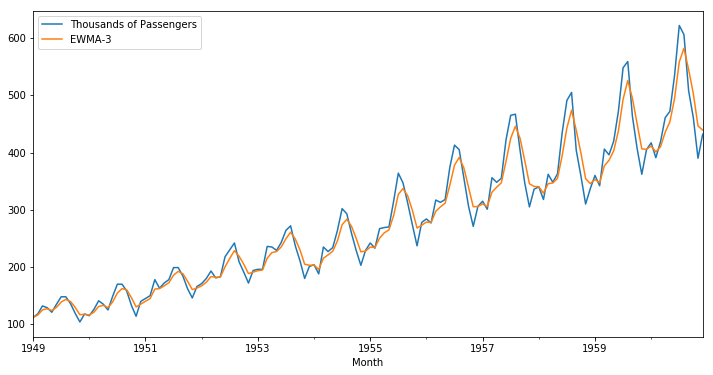

In [15]:
airline['EWMA-3'] = airline['Thousands of Passengers'].ewm(span=3).mean()
airline[['Thousands of Passengers','EWMA-3']].plot(figsize=(12,6))

# ETS (Error-Trend-Seasonality Decomposition)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

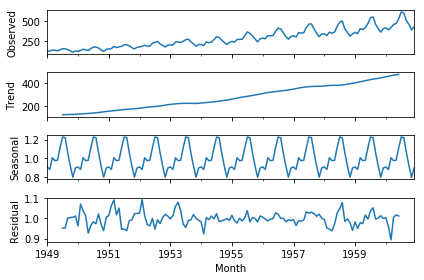

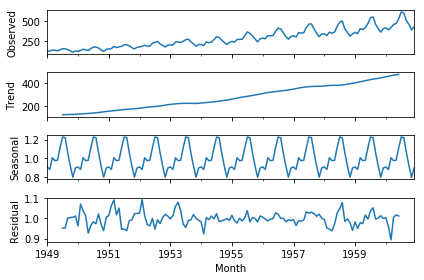

In [18]:
result.plot()

In [19]:
result1 = seasonal_decompose(airline['Thousands of Passengers'],model='additive')

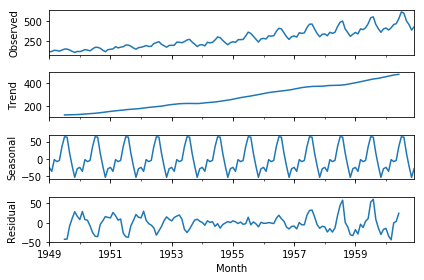

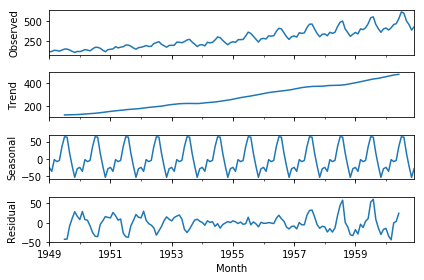

In [20]:
result1.plot()

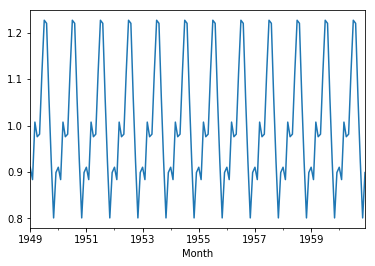

In [27]:
#result.trend.plot()
result.seasonal.plot()
